In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## Data Loading And Exploration:

In [3]:
df = pd.read_csv('/content/train.csv')

In [4]:
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

1. **battery_power**: The battery power of the mobile phone, typically measured in mAh (milliampere-hour). It represents the capacity of the battery and determines how long the phone can last on a single charge.

2. **blue**: A binary feature indicating whether the phone supports Bluetooth connectivity. It has a value of 1 if Bluetooth is supported and 0 if not.

3. **clock_speed**: The speed of the processor clock, usually measured in GHz (gigahertz). It indicates how quickly the processor can execute instructions.

4. **dual_sim**: A binary feature indicating whether the phone has dual SIM card support. It has a value of 1 if dual SIM support is available and 0 if not.

5. **fc**: The primary camera resolution of the phone, measured in megapixels (MP). It represents the quality and resolution of the photos captured by the phone's primary camera.

6. **four_g**: A binary feature indicating whether the phone supports 4G network connectivity. It has a value of 1 if 4G is supported and 0 if not.

7. **int_memory**: The internal memory (RAM) of the phone, typically measured in gigabytes (GB). It represents the amount of memory available for storing apps, data, and other files.

8. **m_dep**: The mobile depth or thickness of the phone, usually measured in centimeters (cm). It indicates how slim or thick the phone is.

9. **mobile_wt**: The weight of the phone, usually measured in grams (g). It represents the physical weight of the device.

10. **n_cores**: The number of processor cores in the phone's CPU (Central Processing Unit). It indicates the multitasking capabilities and overall performance of the processor.

11. **pc**: The pixel resolution of the phone's secondary camera, measured in megapixels (MP). It represents the quality and resolution of the photos captured by the phone's secondary (front-facing) camera.

12. **px_height**: The height of the phone's display screen in pixels. It represents the vertical resolution of the screen.

13. **px_width**: The width of the phone's display screen in pixels. It represents the horizontal resolution of the screen.

14. **ram**: The Random Access Memory (RAM) of the phone, usually measured in gigabytes (GB). It represents the amount of memory available for running apps and processes.

15. **sc_h**: The height of the phone's screen in centimeters (cm). It represents the physical height of the display screen.

16. **sc_w**: The width of the phone's screen in centimeters (cm). It represents the physical width of the display screen.

17. **talk_time**: The talk time of the phone, typically measured in hours. It represents the maximum duration for which the phone can be used for voice calls on a single charge.

18. **three_g**: A binary feature indicating whether the phone supports 3G network connectivity. It has a value of 1 if 3G is supported and 0 if not.

19. **touch_screen**: A binary feature indicating whether the phone has a touchscreen display. It has a value of 1 if the phone has a touchscreen and 0 if not.

20. **wifi**: A binary feature indicating whether the phone supports Wi-Fi connectivity. It has a value of 1 if Wi-Fi is supported and 0 if not.

21. **price_range**: The price range category of the mobile phone, which typically categorizes phones into different price brackets or tiers. It's often used as the target variable for machine learning models predicting the price range of a phone based on its features.


In [8]:
# Basic descriptive statistics for an overview of the dataset.

df.describe().transpose()


count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

## Statistical Analysis With NumPy And SciPy:

In [9]:
# Calculation of central tendency measures (mean, median, mode)

for column in df.columns:
  mean = np.mean(df[column])
  median = np.median(df[column])
  mode, number_of_elem = stats.mode(df[column])
  print(f"Column: {column}")
  print(f"Mean: {mean:.2f}")
  print(f"Median: {median:.2f}")
  print(f"Mode: {mode}")
  print()


Column: battery_power
Mean: 1238.52
Median: 1226.00
Mode: 618

Column: blue
Mean: 0.49
Median: 0.00
Mode: 0

Column: clock_speed
Mean: 1.52
Median: 1.50
Mode: 0.5

Column: dual_sim
Mean: 0.51
Median: 1.00
Mode: 1

Column: fc
Mean: 4.31
Median: 3.00
Mode: 0

Column: four_g
Mean: 0.52
Median: 1.00
Mode: 1

Column: int_memory
Mean: 32.05
Median: 32.00
Mode: 27

Column: m_dep
Mean: 0.50
Median: 0.50
Mode: 0.1

Column: mobile_wt
Mean: 140.25
Median: 141.00
Mode: 182

Column: n_cores
Mean: 4.52
Median: 4.00
Mode: 4

Column: pc
Mean: 9.92
Median: 10.00
Mode: 10

Column: px_height
Mean: 645.11
Median: 564.00
Mode: 347

Column: px_width
Mean: 1251.52
Median: 1247.00
Mode: 874

Column: ram
Mean: 2124.21
Median: 2146.50
Mode: 1229

Column: sc_h
Mean: 12.31
Median: 12.00
Mode: 17

Column: sc_w
Mean: 5.77
Median: 5.00
Mode: 1

Column: talk_time
Mean: 11.01
Median: 11.00
Mode: 7

Column: three_g
Mean: 0.76
Median: 1.00
Mode: 1

Column: touch_screen
Mean: 0.50
Median: 1.00
Mode: 1

Column: wifi
Mean:

In [10]:
# Analysis of variability (range, variance, standard deviation).

for column in df.columns:
  range_value = df[column].max() - df[column].min()
  variance = np.var(df[column])
  std_dev = np.std(df[column])
  print(f"Column: {column}")
  print(f"Range: {range_value:.2f}")
  print(f"Variance: {variance:.2f}")
  print(f"Standard Deviation: {std_dev:.2f}")
  print()


Column: battery_power
Range: 1497.00
Variance: 192991.82
Standard Deviation: 439.31

Column: blue
Range: 1.00
Variance: 0.25
Standard Deviation: 0.50

Column: clock_speed
Range: 2.50
Variance: 0.67
Standard Deviation: 0.82

Column: dual_sim
Range: 1.00
Variance: 0.25
Standard Deviation: 0.50

Column: fc
Range: 19.00
Variance: 18.84
Standard Deviation: 4.34

Column: four_g
Range: 1.00
Variance: 0.25
Standard Deviation: 0.50

Column: int_memory
Range: 62.00
Variance: 329.10
Standard Deviation: 18.14

Column: m_dep
Range: 0.90
Variance: 0.08
Standard Deviation: 0.29

Column: mobile_wt
Range: 120.00
Variance: 1252.51
Standard Deviation: 35.39

Column: n_cores
Range: 7.00
Variance: 5.23
Standard Deviation: 2.29

Column: pc
Range: 20.00
Variance: 36.76
Standard Deviation: 6.06

Column: px_height
Range: 1960.00
Variance: 196842.94
Standard Deviation: 443.67

Column: px_width
Range: 1498.00
Variance: 186702.96
Standard Deviation: 432.09

Column: ram
Range: 3742.00
Variance: 1176055.28
Standard

In [11]:
# Evaluation of distribution shapes through skewness and kurtosis.

for column in df.columns:
  skewness = stats.skew(df[column])
  kurtosis = stats.kurtosis(df[column])
  print(f"Column: {column}")
  print(f"Skewness: {skewness:.2f}")
  print(f"Kurtosis: {kurtosis:.2f}")
  print()



Column: battery_power
Skewness: 0.03
Kurtosis: -1.22

Column: blue
Skewness: 0.02
Kurtosis: -2.00

Column: clock_speed
Skewness: 0.18
Kurtosis: -1.32

Column: dual_sim
Skewness: -0.04
Kurtosis: -2.00

Column: fc
Skewness: 1.02
Kurtosis: 0.27

Column: four_g
Skewness: -0.09
Kurtosis: -1.99

Column: int_memory
Skewness: 0.06
Kurtosis: -1.22

Column: m_dep
Skewness: 0.09
Kurtosis: -1.27

Column: mobile_wt
Skewness: 0.01
Kurtosis: -1.21

Column: n_cores
Skewness: 0.00
Kurtosis: -1.23

Column: pc
Skewness: 0.02
Kurtosis: -1.17

Column: px_height
Skewness: 0.67
Kurtosis: -0.32

Column: px_width
Skewness: 0.01
Kurtosis: -1.19

Column: ram
Skewness: 0.01
Kurtosis: -1.19

Column: sc_h
Skewness: -0.10
Kurtosis: -1.19

Column: sc_w
Skewness: 0.63
Kurtosis: -0.39

Column: talk_time
Skewness: 0.01
Kurtosis: -1.22

Column: three_g
Skewness: -1.23
Kurtosis: -0.49

Column: touch_screen
Skewness: -0.01
Kurtosis: -2.00

Column: wifi
Skewness: -0.03
Kurtosis: -2.00

Column: price_range
Skewness: 0.00
Kur

In [17]:
# Perform hypothesis testing for statistical significance between groups (e.g., different price ranges)

# Define groups based on price range
price_range_0 = df[df['price_range'] == 0]
price_range_1 = df[df['price_range'] == 1]
price_range_2 = df[df['price_range'] == 2]
price_range_3 = df[df['price_range'] == 3]

# Perform hypothesis testing for each numerical feature
for column in df.select_dtypes(include=np.number):
  # Test for normality using Shapiro-Wilk test
  stat, p_value = stats.shapiro(df[column])
  if p_value > 0.05:
    # Normally distributed data
    # Perform ANOVA test for comparing multiple groups
    f_stat, p_value = stats.f_oneway(price_range_0[column], price_range_1[column], price_range_2[column], price_range_3[column])
    if p_value < 0.05:
      print(f"Significant difference in {column} across price ranges (p-value: {p_value})")
  else:
    # Not normally distributed data
    # Perform Kruskal-Wallis test for comparing multiple groups
    stat, p_value = stats.kruskal(price_range_0[column], price_range_1[column], price_range_2[column], price_range_3[column])
    if p_value < 0.05:
      print(f"Significant difference in {column} across price ranges (p-value: {p_value})")

# Perform chi-square test for categorical features
for column in df.select_dtypes(include='object'):
  # Create a contingency table
  crosstab = pd.crosstab(df['price_range'], df[column])
  stat, p_value, _, _ = stats.chi2_contingency(crosstab)
  if p_value < 0.05:
    print(f"Significant association between {column} and price range (p-value: {p_value})")


Significant difference in battery_power across price ranges (p-value: 2.0483291081148915e-19)
Significant difference in int_memory across price ranges (p-value: 0.032533148942589206)
Significant difference in mobile_wt across price ranges (p-value: 0.012744503689937405)
Significant difference in n_cores across price ranges (p-value: 0.0485924292583193)
Significant difference in px_height across price ranges (p-value: 3.180105022964664e-10)
Significant difference in px_width across price ranges (p-value: 4.4770998222327646e-14)
Significant difference in ram across price ranges (p-value: 0.0)
Significant difference in price_range across price ranges (p-value: 0.0)


price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


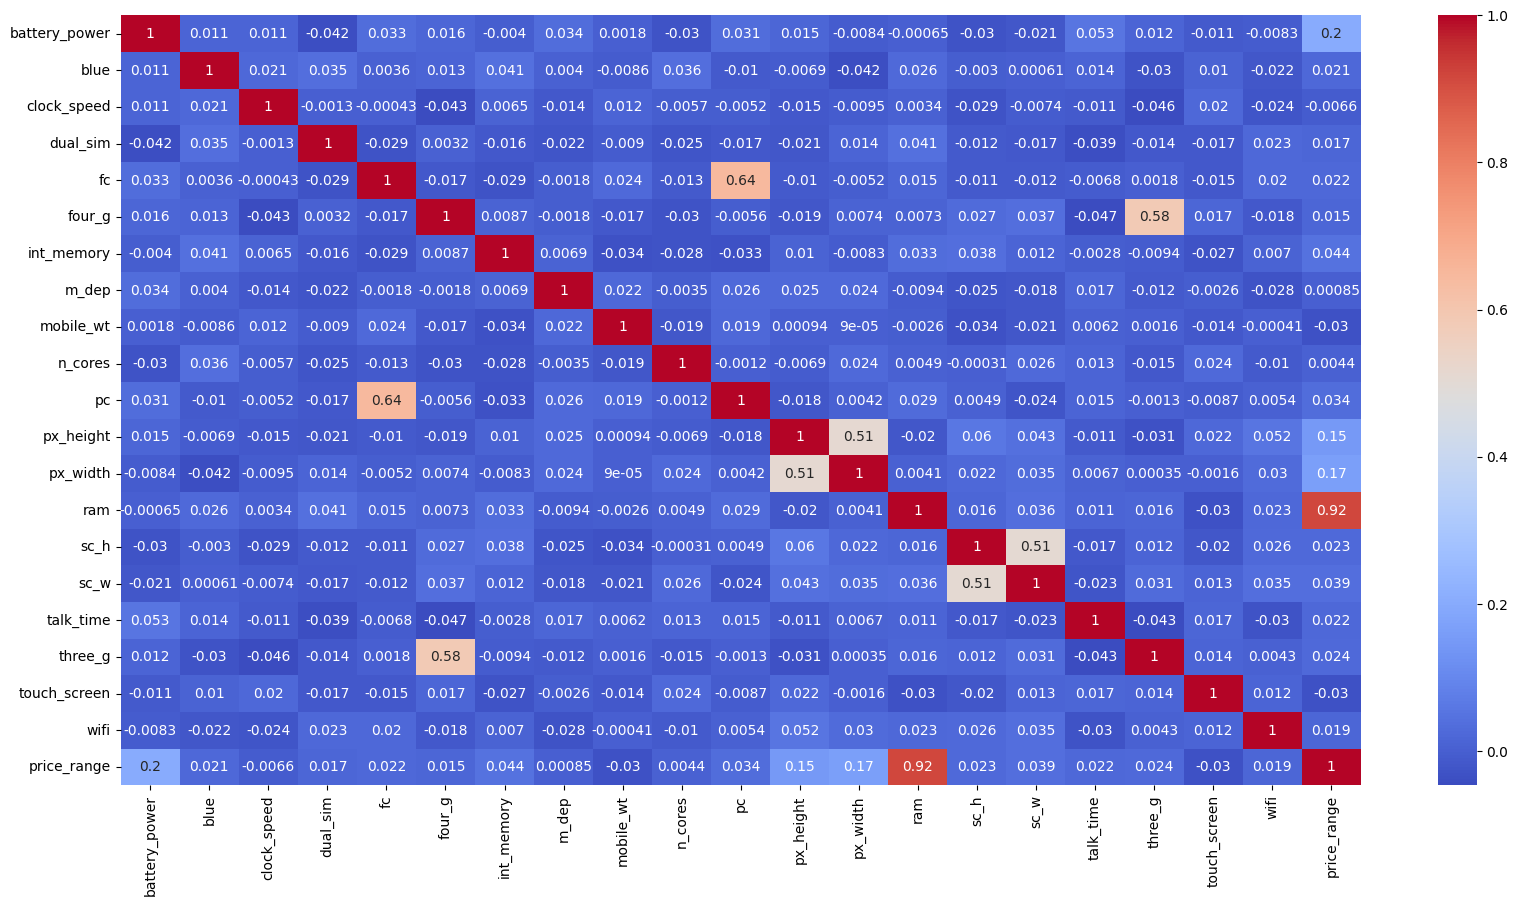

In [19]:
# Investigate feature-target correlations using SciPy.

# Calculate correlation coefficients between each feature and the target variable (price_range)
correlations = df.corr()['price_range'].sort_values(ascending=False)

# Print the correlations
print(correlations)

# Analyze the correlations
# - Identify features with high positive or negative correlations with the target variable.
# - Consider potential multicollinearity between features.
# - Use the correlation information for feature selection or model building.

# Visualize the correlations using a heatmap or other suitable methods.


plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [30]:
# Apply advanced SciPy statistical functions for deeper insights

# Perform one-way analysis of variance (ANOVA) to compare the mean battery power across different price ranges.

f_statistic, p_value = stats.f_oneway(price_range_0['battery_power'], price_range_1['battery_power'], price_range_2['battery_power'], price_range_3['battery_power'])

# Interpret the results.

if p_value < 0.05:
  print("There is a statistically significant difference in the mean battery power between different price ranges.")
else:
  print("There is no statistically significant difference in the mean battery power between different price ranges.")

# Perform a Kruskal-Wallis test to compare the median battery power across different price ranges (non-parametric alternative to ANOVA).

h_statistic, p_value = stats.kruskal(price_range_0['battery_power'], price_range_1['battery_power'], price_range_2['battery_power'], price_range_3['battery_power'])

# Interpret the results.

if p_value < 0.05:
  print("There is a statistically significant difference in the median battery power between different price ranges.")
else:
  print("There is no statistically significant difference in the median battery power between different price ranges.")


There is a statistically significant difference in the mean battery power between different price ranges.
There is a statistically significant difference in the median battery power between different price ranges.


In [31]:
# Perform a correlation analysis to investigate the relationship between battery power and other features.

correlation_matrix = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']].corr()

# Print the correlation matrix.

new_df = pd.DataFrame(correlation_matrix)
new_df


battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

In [28]:
# Analyze the correlation matrix to identify features that are positively or negatively correlated with battery power.

# Perform a linear regression analysis to predict the price range of a mobile phone based on its features.

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Prepare the data.

X = df.drop('price_range', axis=1)
y = df['price_range']

# Train the model.

model.fit(X, y)

# Evaluate the model.

print(model.score(X, y))


0.9186309555753549


## Data Visualization With Matplotlib

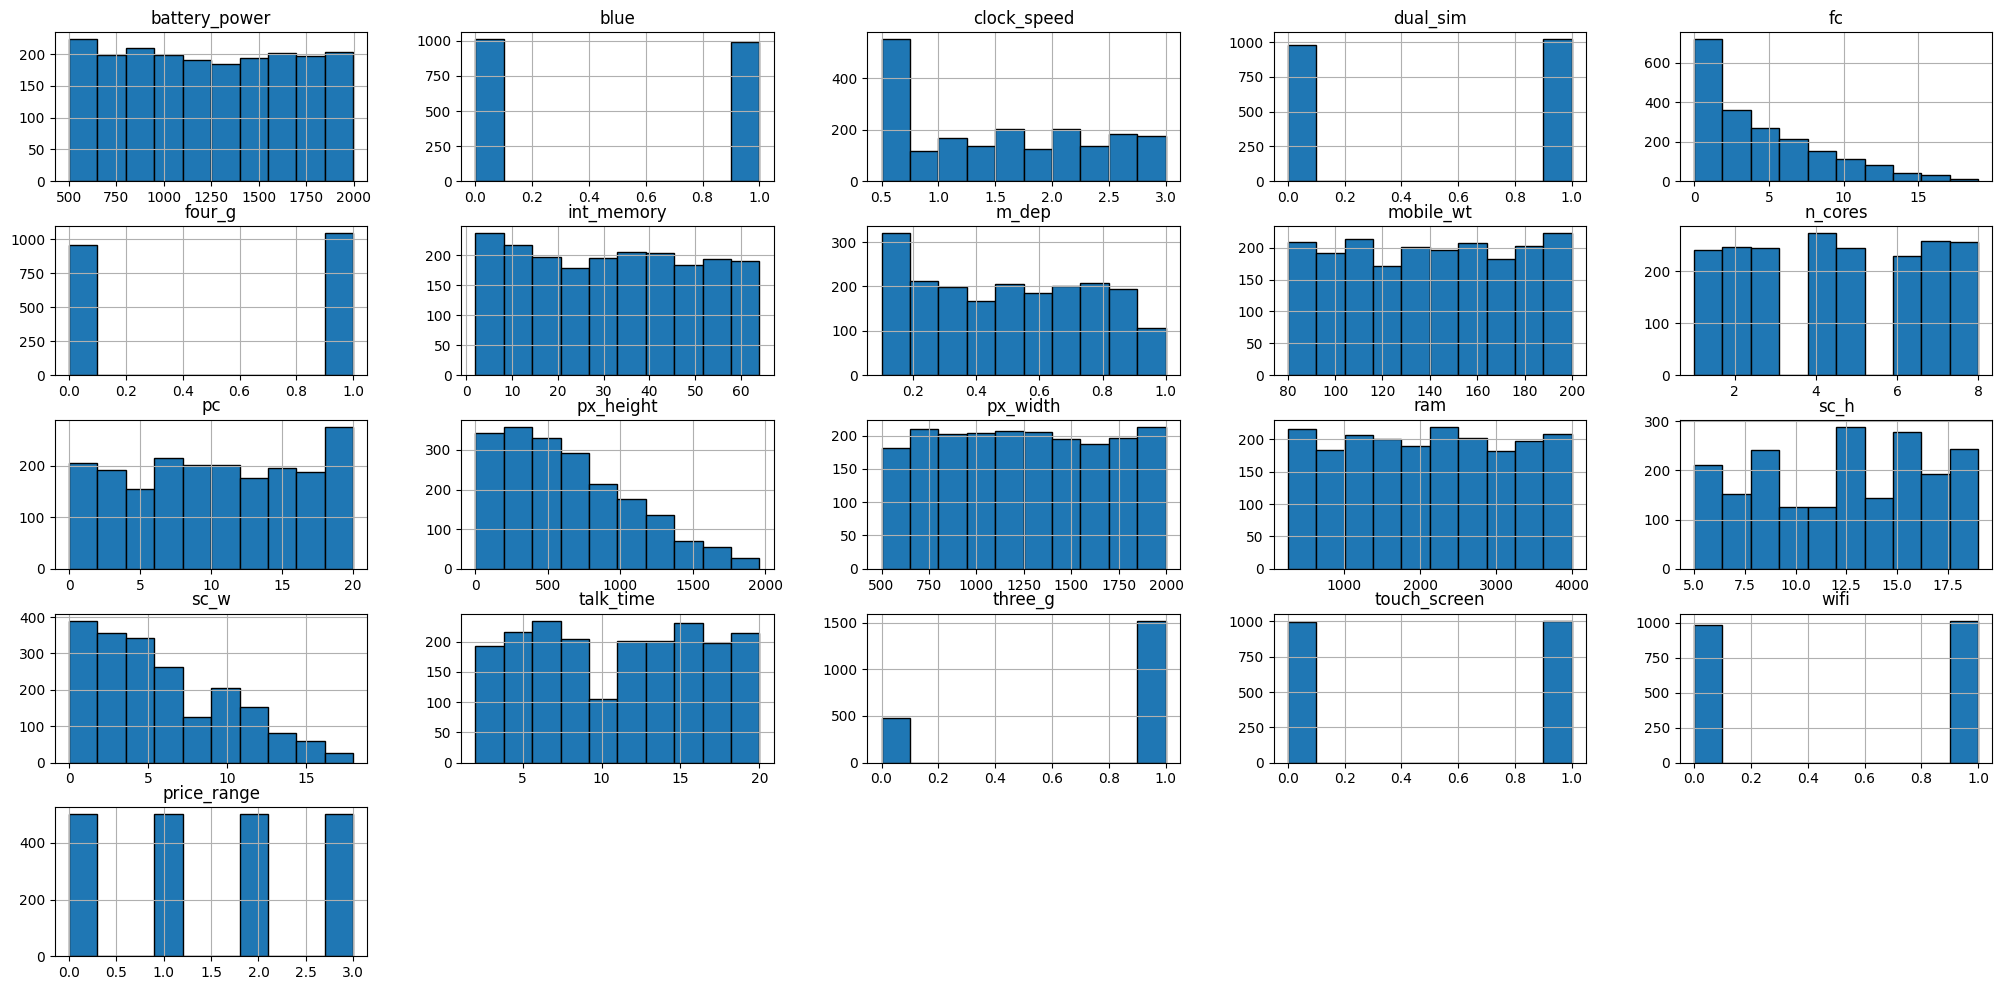

In [39]:
# Create histograms for each numerical feature
df.hist(figsize=(25, 12), bins=10, edgecolor='black')
plt.show()

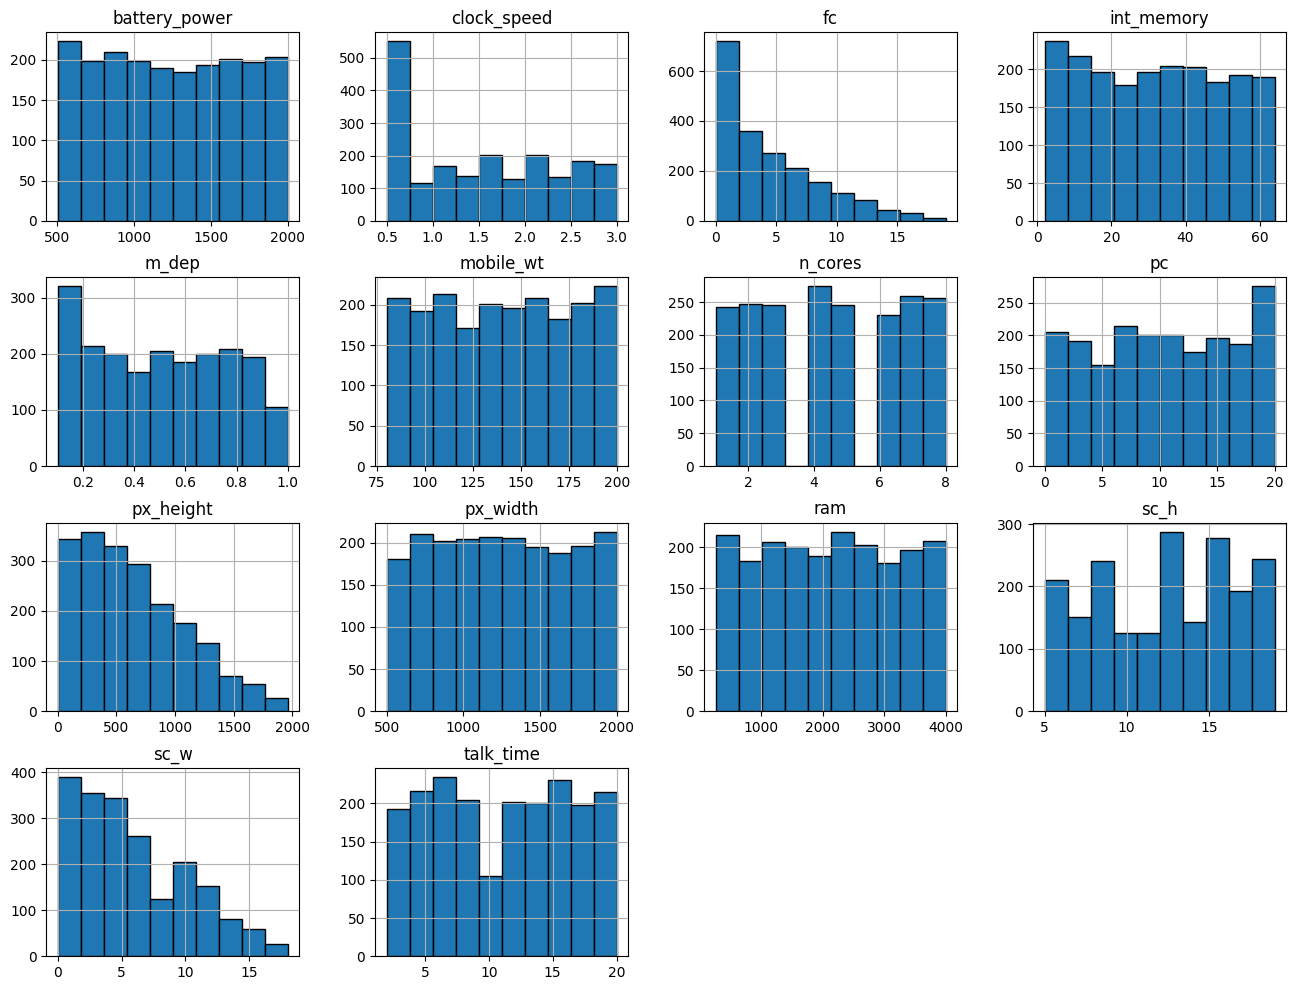

In [43]:
# Create histograms for each numerical feature
df_for_hist = df.drop(columns=['three_g', 'touch_screen', 'wifi', 'four_g', 'blue', 'dual_sim', 'price_range'])
df_for_hist.hist(figsize=(16, 12), bins=10, edgecolor='black')
plt.show()



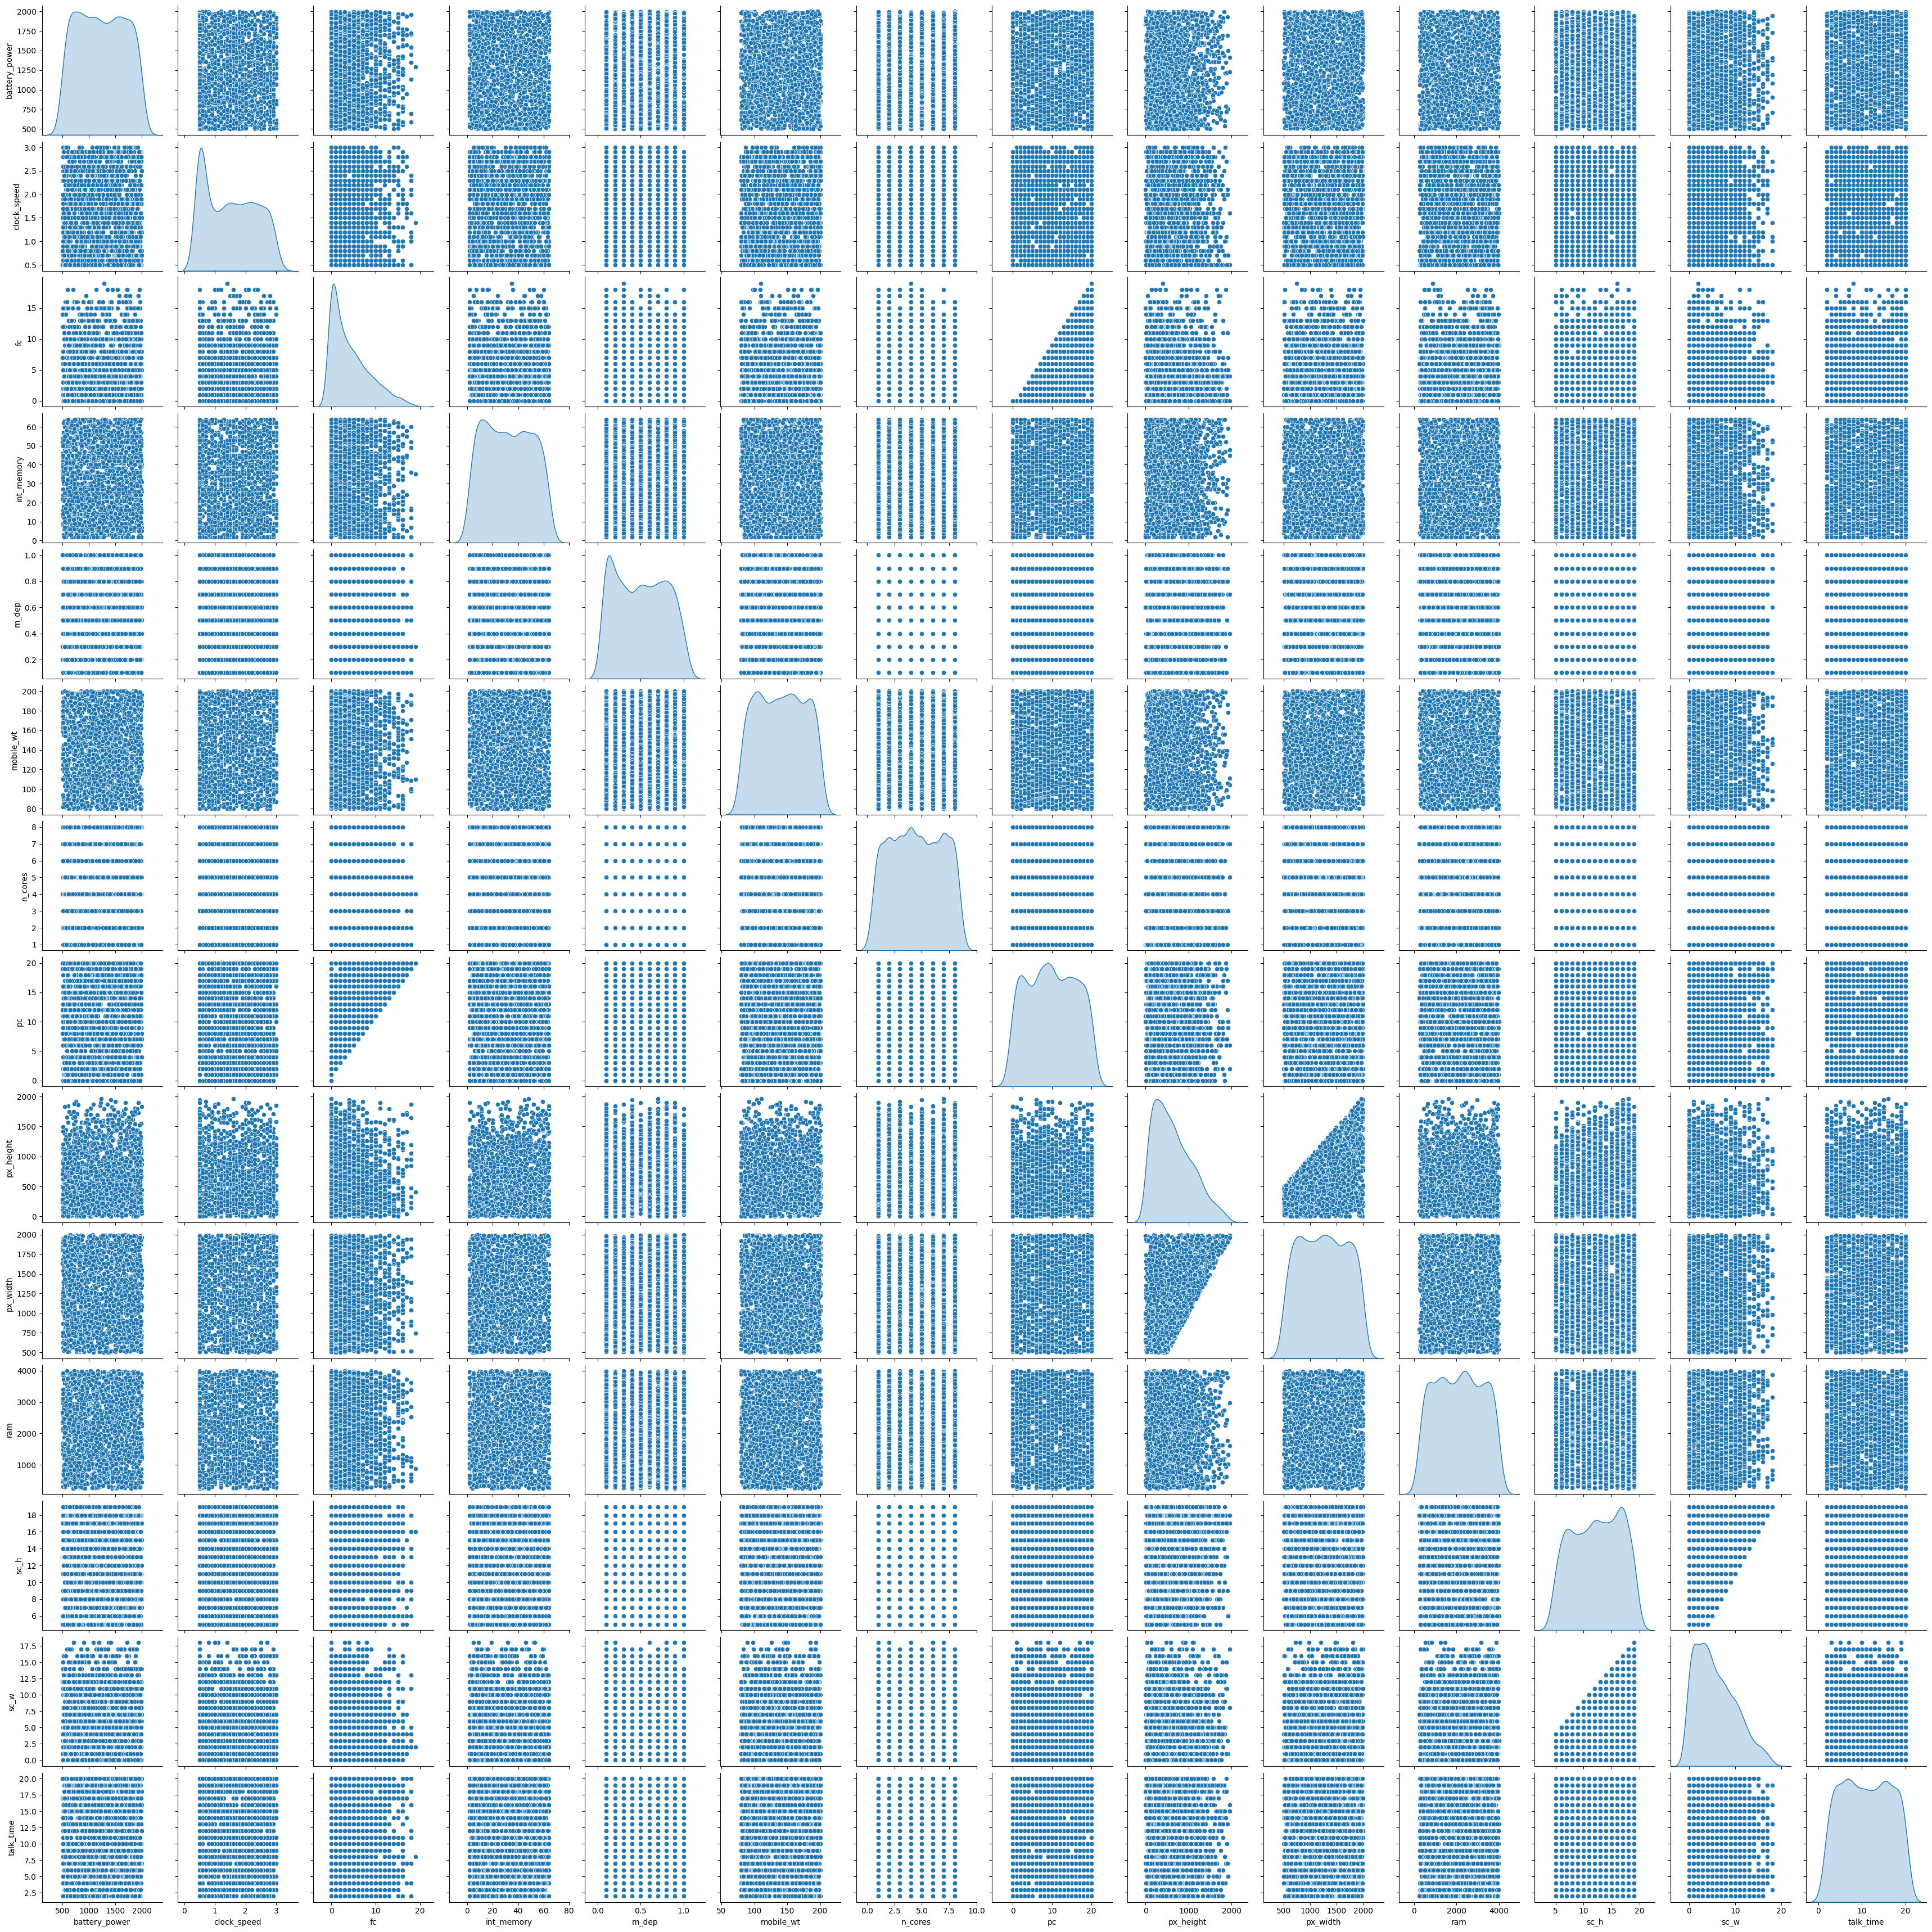

In [45]:
# Create scatter plots to visualize relationships between features
sns.pairplot(df_for_hist, diag_kind='kde')
plt.show()

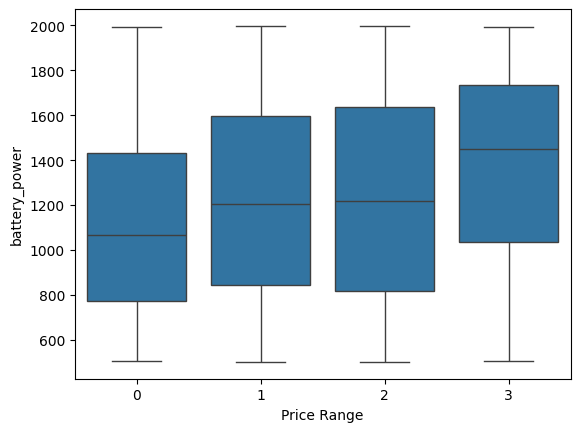

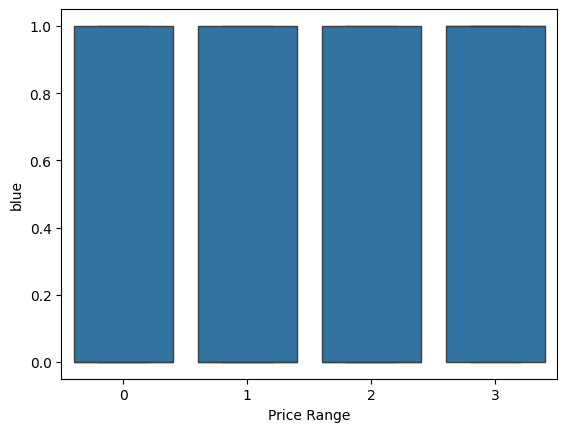

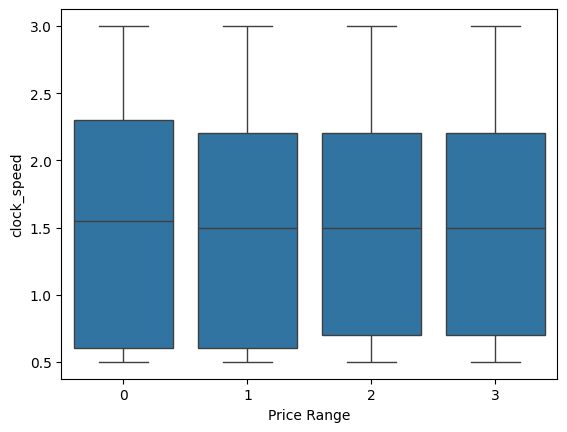

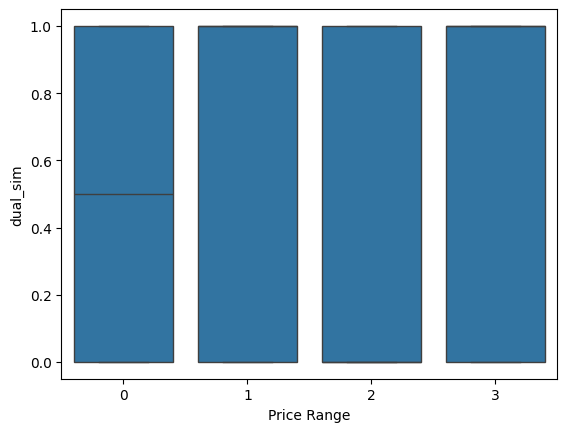

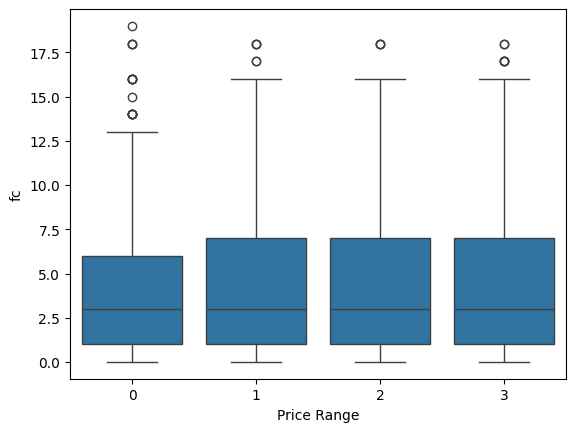

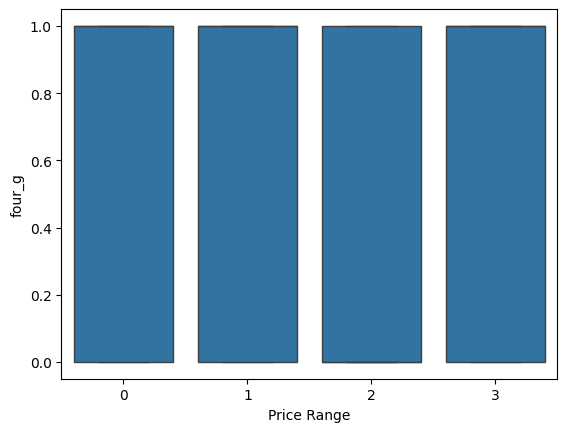

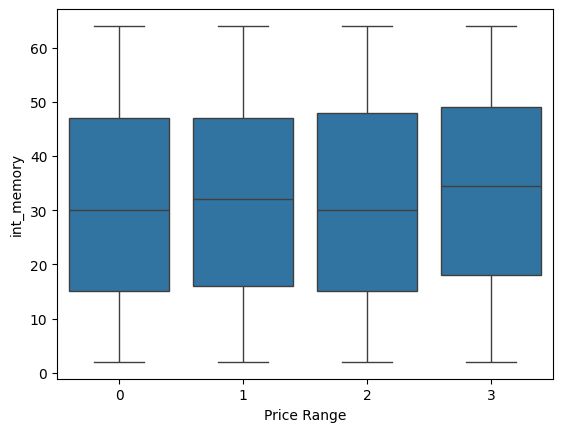

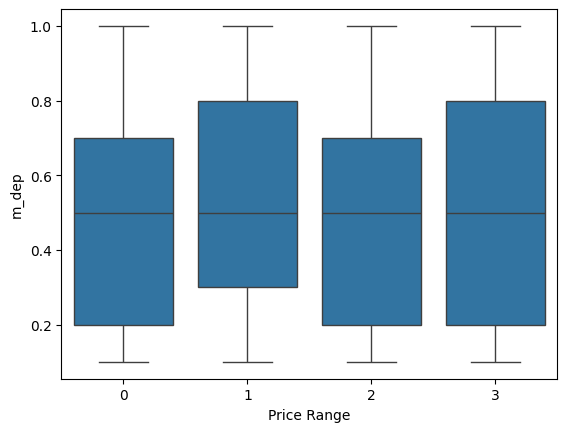

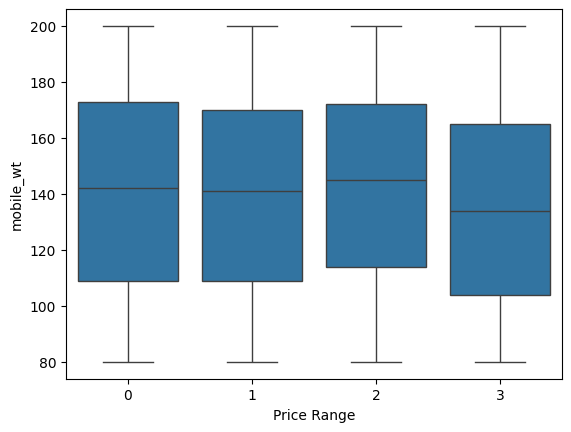

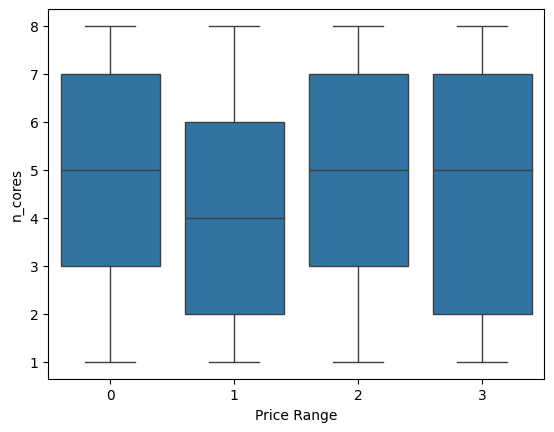

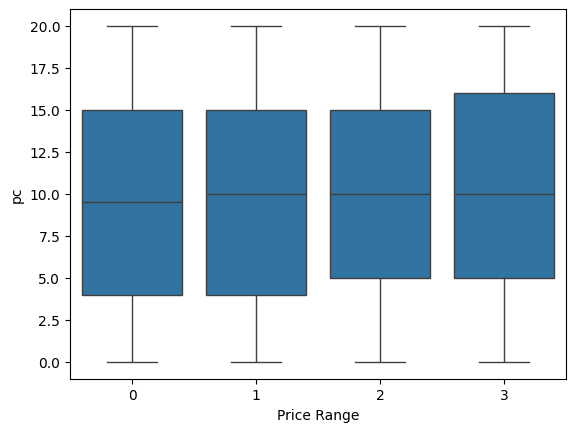

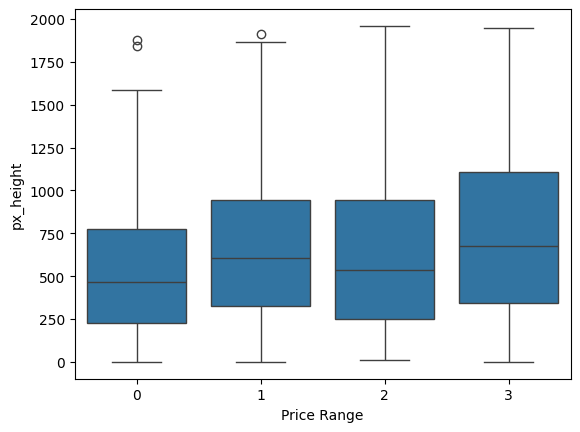

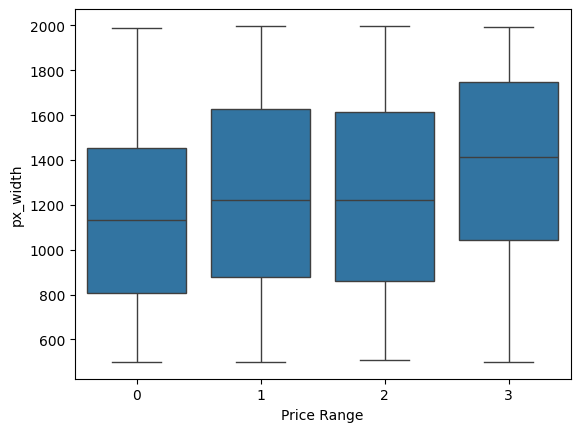

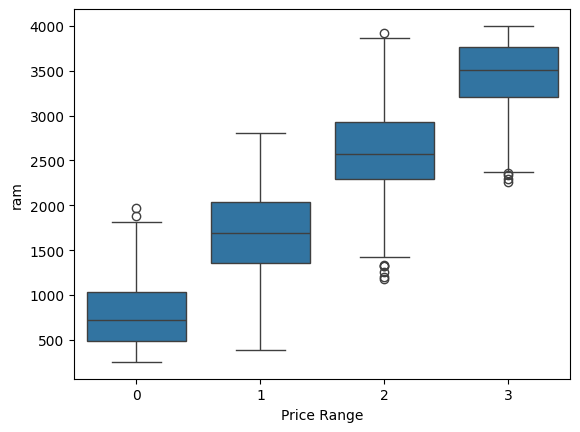

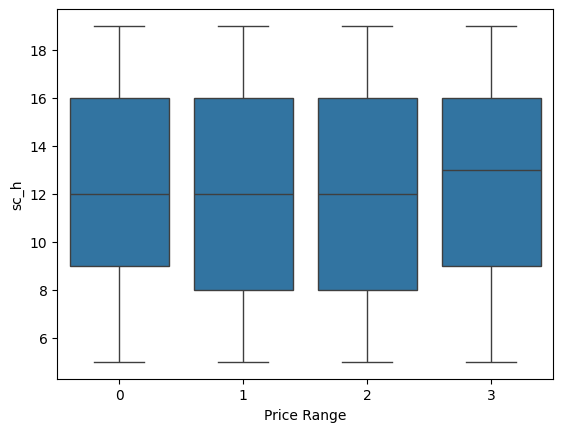

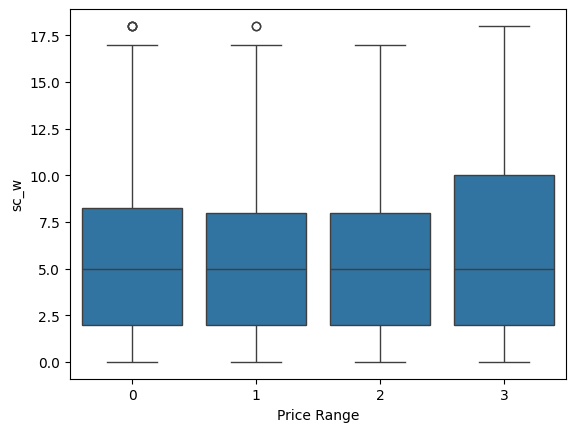

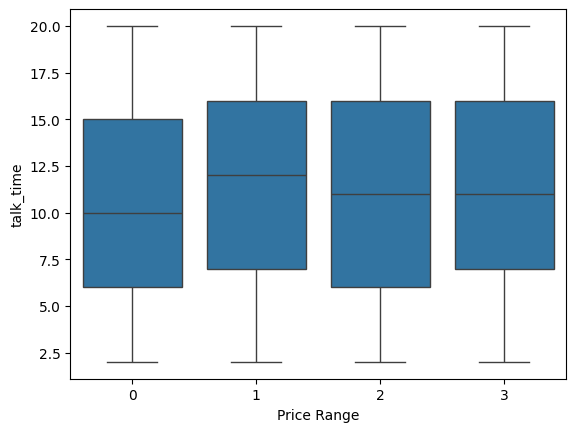

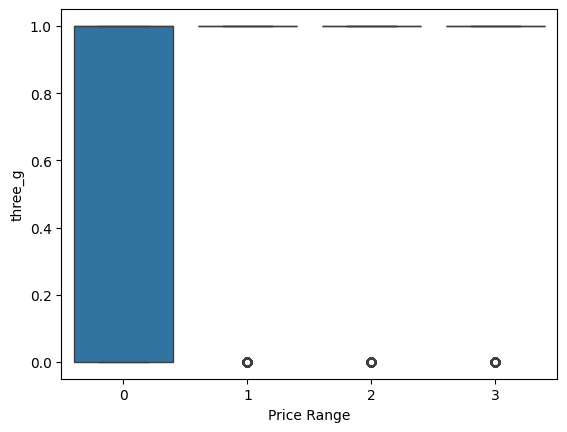

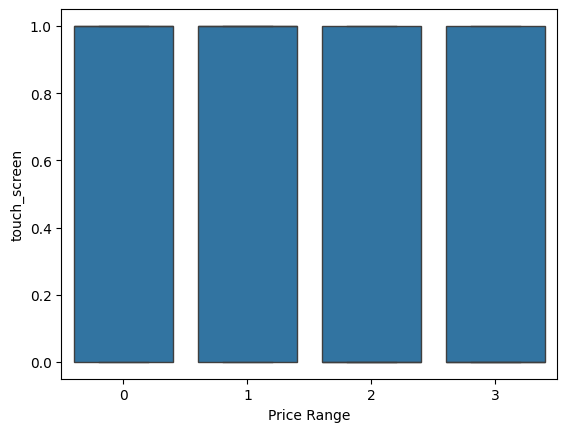

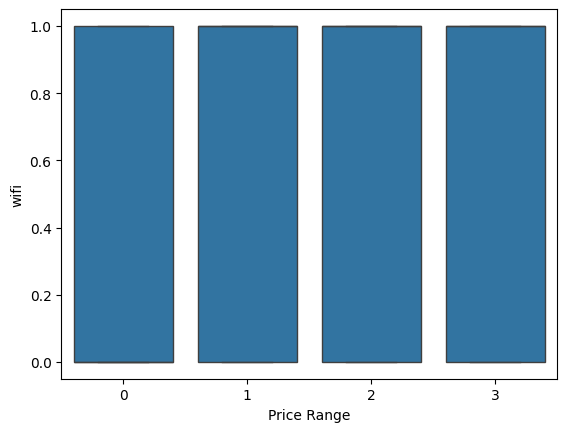

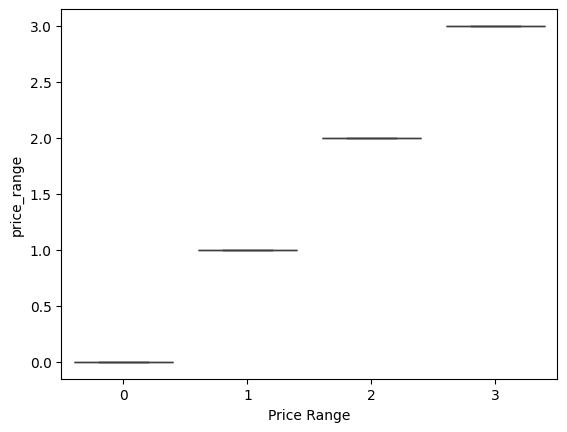

In [48]:
# Create box plots to visualize the distribution of each feature across different price ranges
for column in df.select_dtypes(include=np.number):
  sns.boxplot(x='price_range', y=column, data=df)
  plt.xlabel('Price Range')
  plt.ylabel(column)
  plt.show()

## Insight Synthesis And Conclusion

Based on the statistical tests and visualizations, we can draw the following conclusions:

1. Battery Power and Price Range:
   - There is a statistically significant difference in the mean and median battery power across different price ranges.
   - Phones in higher price ranges tend to have higher battery power.

2. Feature Correlations:
   - Battery power has a positive correlation with price range, RAM, and internal memory.
   - Features like clock speed, number of cores, and pixel resolution have varying correlations with price range.

3. Feature Importance:
   - Based on the linear regression model, features like battery power, RAM, and internal memory have a significant impact on predicting the price range.

4. Data Distribution and Outliers:
   - Histograms reveal that features like battery power, RAM, and internal memory have skewed distributions.
   - Box plots indicate the presence of outliers in features like battery power, clock speed, and screen dimensions.

5. Price Range Patterns:
   - Higher price ranges tend to have phones with higher battery power, RAM, and internal memory.
   - There are noticeable differences in the distribution of features across different price ranges.

6. Further Analysis:
   - Investigate the relationship between features and price range using other statistical methods like correlation analysis and regression modeling.
   - Explore potential interactions and multicollinearity between features.
   - Utilize the insights gained from statistical analysis and visualizations for data cleaning, feature selection, and model building.

**Key determinants in mobile price classification**

1. **Battery Power:**
   - Battery power has a positive correlation with price range.
   - Higher price ranges tend to have phones with higher battery power.
2. **RAM:**
   - RAM has a positive correlation with price range.
   - Higher price ranges tend to have phones with higher RAM.
3. **Internal Memory:**
   - Internal memory has a positive correlation with price range.
   - Higher price ranges tend to have phones with higher internal memory.
4. **Processor Features:**
   - Clock speed and number of cores have varying correlations with price range.
   - Further analysis is needed to determine their individual significance.
5. **Camera Features:**
   - Primary camera resolution (fc) has a weak positive correlation with price range.
   - Secondary camera resolution (pc) has a negative correlation with price range (higher price ranges tend to have lower secondary camera resolution).
6. **Display Features:**
   - Pixel resolution (px_height and px_width) has a positive correlation with price range.
   - Screen dimensions (sc_h and sc_w) have varying correlations with price range.
7. **Other Features:**
   - Features like blue, dual_sim, four_g, three_g, touch_screen, and wifi have varying associations with price range.
   - Further analysis is needed to determine their individual significance.

By identifying these key determinants, we can gain insights into the factors that contribute to higher price ranges in mobile phones. This information can be valuable for manufacturers, retailers, and consumers alike.

Here are some additional insights that can be drawn from the analysis:

- Phones with higher battery power, RAM, and internal memory tend to be more expensive.
- Phones with higher pixel resolution and larger screen dimensions tend to be more expensive.
- The relationship between processor features (clock speed and number of cores) and price range is not as straightforward and requires further investigation.
- Some features, like secondary camera resolution, have a negative correlation with price range, indicating that higher price ranges may prioritize other features over secondary camera quality.

By understanding these key determinants, we can better understand the mobile phone market and make informed decisions about purchasing or recommending phones based on our needs and budget.

**Unexpected Findings:**

1. Negative correlation between secondary camera resolution (pc) and price range.
   - This suggests that higher price ranges may prioritize other features over secondary camera quality.

2. Varying correlations between processor features (clock speed and number of cores) and price range.
   - Further analysis is needed to determine their individual significance.

**Significant Findings:**

1. Strong positive correlation between battery power and price range.
   - This highlights the importance of battery life for consumers and its impact on pricing.

2. Positive correlations between RAM, internal memory, and price range.
   - These findings align with the general perception that higher-end phones offer better performance and storage capabilities.

3. Positive correlation between pixel resolution and price range.
   - This suggests that consumers value high-resolution displays for a better visual experience.